### 2.8 Доверительные интервалы

Проверка гипотез - качественная оценка, с помощью доверительных интервалов можем получить количественную оценку.

**ДИ для разности средних**

Видоизменим формулу для t так, чтобы распределение были центрировано относительно 0, просто вычтя разность истинных средних распредления.

**t** = $ \frac{Разность выборочных средних - Разность истинных средних} {Стандартная ошибка разности выборочных средних} $

**t** = $ \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}} = \frac{(\overline{X_1}-\overline{X_2}) - (\mu_1 - \mu_2)} {{S_{\overline{X_1} - \overline{X_2}}}} $, также справедливо

$- t_{\alpha} < \frac{(\overline{X_1}-\overline{X_2}) - (\mu_1 - \mu_2)} {{S_{\overline{X_1} - \overline{X_2}}}} < + t_{\alpha}$,

$ (\overline{X_1}-\overline{X_2}) - t_{\alpha} S_{\overline{X_1} - \overline{X_2}} < \mu_1 - \mu_2 <  (\overline{X_1}-\overline{X_2}) + t_{\alpha} S_{\overline{X_1} - \overline{X_2}} $

Значение функции t уже определены заранее (0.05).

Полученное неравенство задает доверительный интервал для разности средних.

In [61]:
#Расчет для задачи про курьеров на разных транспортных средствах
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(norm_vel_sample), sms.DescrStatsW(norm_sam_sample))
print (cm.tconfint_diff())

(2.193246054106253, 12.074549868168745)


То есть, с 95% вероятностью можно утверждать, что с новыми самокатами курьеры уменьшили время доставки от 2 до 12 минут.

**Если 100(1 – α)-процентный доверительный интервал разности средних не содержит нуля, то различия статистически значимы (Р < α); напротив, если этот интервал содержит ноль, то различия статистически не значимы (Р > α).**

С помощью доверительных интервалов мы точно также можем проверять статистические гипотезы.

In [62]:
cm = sms.CompareMeans(sms.DescrStatsW(norm_vel_sample), sms.DescrStatsW(norm_sam_sample))
print (cm.tconfint_diff(alpha=0.01))

(0.5937291645763487, 13.67406675769865)


Здесь уже утверждаем с вероятностью 99%.

**ДИ для среднего**

$ \overline{X} - t_{\alpha} S_{\overline{X}} < \mu <  \overline{X} + t_{\alpha} S_{\overline{X}} $

In [63]:
t = sms.DescrStatsW(norm_vel_sample)
t.tconfint_mean()

(33.953815646808934, 40.232518299735275)

То есть истинное среднее с 95% вероятностью лежит в интервале от 34 до 40 минуты.

**ДИ для разности долей**

$ (\hat{p_1}-\hat{p_2}) - z_{\alpha} S_{\hat{p_1} - \hat{p_2}} < p1 - p2 <  (\hat{p_1}-\hat{p_2}) + z_{\alpha} S_{\hat{p_1} - \hat{p_2}} $

In [64]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05): 
    #PPF - оппределяет значение функции по заданной вероятности     
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

**ДИ для разности долей (связанные выборки)**

$$ \frac{f - g}{n} - z_{\alpha}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}} <p_1 - p_2 <  \frac{f - g}{n} + z_{\alpha}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [65]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

**ДИ для доли**

$ \hat{p} - z_{\alpha} S_{\hat{p}}< p  < \hat{p} + z_{\alpha} S_{\hat{p}} $

In [66]:
import statsmodels
statsmodels.stats.proportion.proportion_confint(400,800)

(0.465352404391258, 0.534647595608742)

Доверительный интервал для доли кликов на баннер B.

### Непараметрические критерии

Непараметрические критерии не требуют соответствия какому-либо из распределений. Непараметрические критерии заменяют реальные значения признака рангами. 

По сравнению с парамтерическими критериями, непараметрические - менее чувствительны.

<img width = '800px' src="images/lesson_8/non_param.png">

### 2.9 Критерий знаков 

### Одновыборочный критерий

Очень простой критерий, не требует от выборки практически ничего. Его мощность составляет примерно 2/3 мощности критерия Стьюдента.

Проверим гипотезу о том, что курьеры на велосипедах доставляют заказ за 40 минут.

H0: med X = 40

H1: med X <> 40

M = $ \frac {N(+) - N(-)} {2} $, где N(+) - кол-во значений больше проверяемого значения, N(-) - меньше.

Статистика данного критерия будет иметь биноминальное распределение.

In [67]:
N_plus = len([x for x in norm_vel_sample if x>40])
N_minus = len([x for x in norm_vel_sample if x<40])

In [68]:
M = (N_plus - N_minus)/2
M

-5.0

Статистика критерия имеет биноминальное распределение.

In [69]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(norm_vel_sample, 40)

(-5.0, 0.20263875106454063)

Гипотеза H0 принимается.

### Двувыборочный критерий для связанных выборок

Аналогично можно посчитать критерий для связанных выборок.

$ H0: P(X_1 > X_2) = \frac{1} {2}$

$ H1: P(X_1 > X_2) <> \frac{1} {2}$

Курьерам выдали велосипеды и записали среднее время, с которым они доставляли заказы до и после выдачи. 

In [70]:
df = pd.DataFrame()
df['courier_id'] = np.arange(0,100)
df['time_before'] = norm_rv1.rvs(size=100)
df['time_after'] = norm_rv1.rvs(size=100)
df['stat_M'] = np.where(df.time_before > df.time_after,1,0)
df.head()

,courier_id,time_before,time_after,stat_M
0,0,24.512157,40.502470,0
1,1,33.442539,41.350330,0
2,2,22.912990,34.622615,0
3,3,34.218425,34.643964,0
4,4,23.975635,38.884381,0


Аналогично одновыборочному критерию:

In [71]:
N_plus = df.stat_M.sum()
N_minus = df.shape[0] - N_plus

In [72]:
M = (N_plus - N_minus)/2
M

-12.0

In [73]:
sign_test(df.time_before - df.time_after)

(-12.0, 0.020978735677851718)

### Ранговые критерии

Ранговые критерии выбрасывают большую часть информации, вместо значений используют лишь бинарный вектор, ранговые критерии сохрнаяют больше информации. Ранг - позиция элемента в вариационном ряду. 

### 2.10 Критерий знаков рангов Уилкоксона

### Одновыборочный критерий

$H0: medX = m0$

$H1: medX <> m0$
    
$ статистика: W = \sum_{i=1}^N rank(|Xi −m0|)·sign(Xi −m0)$

Нулевое распределение данного критерия - табличное.

При справедливости нулевой гипотезы каждый из рангов в выборке мог с одинаковой вероятностью реализоваться с любым знаком (sign(Xi −m0)): и с «+», и с «−». Таким образом, получается $2^n$ вариантов распределения знаков по рангам.

<img width = '200px' src="images/lesson_8/ranks_.png">

Перебирая все эти варианты, для каждого из них можно вычислить значение статистики.

<img width = '500px' src="images/lesson_8/distr.png">

Ограничения: число измерений - от 5 до 50. Рапределение статистики похоже на нормальное.

**Задача** - проверить, среднее время доставки заказа курьеров на велосипеде равно 40 минутам.

In [74]:
m0 = 40

In [75]:
stats.wilcoxon(norm_vel_sample - m0)

WilcoxonResult(statistic=451.0, pvalue=0.07180752515234809)

### Двувыборочный критерий со связанными выборками

$H0: med(X_1 - X_2) = 0 $

$H1: med(X_1 - X_2) <> 0 $
    
$ статистика: W = \sum_{i=1}^N rank(|X_{1i} − X_{2i}|)·sign(X_{1i} − X_{2i})$

Аналогично одновыборочному критерию.

**Задача** - проверить, значимо ли изменилось время доставки курьеров после выдачи им велосипедов.

In [76]:
stats.wilcoxon(df.time_before.iloc[:50],df.time_after.iloc[:50])

WilcoxonResult(statistic=387.0, pvalue=0.015599803007704178)

### 2.11 Критерий Манна-Уитни

### Двувыборочный критерий с несвязанными выборками

$ H_0: F_{X_{1}} (x) =  F_{X_{2}} (x) $
    
$ H1: F_{X_{1}} (x) =  F_{X_{2}} (x + ∆),∆ <> 0 $

$статистика: R = \sum_{i = 1} ^ N rank(X_{1i}) $

Статистикой будетсумма рангов элементов первой выборки в объединенном вариационном ряду.

Нулевое распределение - табличное (https://statpsy.ru/mana-uitni/tablica-manna-uitni/).

<img width = '300px' src="images/lesson_8/uit_ranks.png">

Если нулевая гипотеза справедлива, то каждый из рангов с одинаковой вероятностью мог реализоваться как в выборке X1, так и в выборке X2. 

Как считается коэффициент:

- в составленном едином ранжированном ряду общее количество рангов получится равным: n1 + n2.
- подсчитываем отдельно сумму рангов, пришедшихся на долю элементов первой выборки, и отдельно - на долю элементов второй выборки.
- определяем большую из двух ранговых сумм (Tx) соответствующую выборке с nx элементами.

$ U = n_1 * n_2 + \frac{n_x*(n_x+1)}{2} - T_x$ 

Критерий подходит для сравнения малых выборок: в каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было 2 значения, но во второй тогда должно быть не менее пяти.

**Задача** - проверить гипотезу  о том, что скорость доставки заказов на электросамокате больше, чем на велосипеде.  

In [109]:
stats.mannwhitneyu(norm_vel_sample, norm_sam_sample, alternative = 'greater')

MannwhitneyuResult(statistic=1655.0, pvalue=0.002647227562245532)

Нулевая гипотеза отвергается.

### 2.12 Перестановочные критерии

При использовании ранговых критериев выборки превращают в ранги, затем делается какое-то дополнительное предположение, и на основании этого предположения получается, что разные конфигурации этих рангов при справедливости нулевой гипотезы могут реализоваться с равной вероятностью. Далее необходимо перебрать все конфигурации, и на каждой посчитать значение статистики — таким образом оценивается ее нулевое распределение.

Если в этом алгоритме пропустить первый пункт(не превращать наблюдения в ранги),а остальное делать точно так же, то получится алгоритм работы перестановочных критериев.

### Одновыборочный критерий

$ H0: EX = m0 $
    
$ H1: EX <> m0 $

 Одновыборочный перестановочный критерий проверяет нулевую гипотезу о значении математического ожидания случайной величины, из которой взята выборка. 

$ T = \sum_{i = 1} ^ N (X_{i} - m_0)$

Нулевое распределение порождается путем перебора $2^n$ знаков перед слагаемыми $ X_{i} - m_0 $.

**Задача** - проверить, среднее время доставки заказа курьеров на велосипеде равно 40 минутам.

In [78]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(map(lambda x: x - mean, sample))
    return t_stat

In [79]:
permutation_t_stat_1sample(norm_vel_sample, 40)

-145.3416513363945

Статистика критерия посчитана, теперь необходимо получить нулевую статистику при верности нулевой гипотезы.

In [80]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))

    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(0,2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        #перебор всех возможных позиций элементов массива 
        signs_array =  itertools.product([-1, 1], repeat = len(sample))  
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

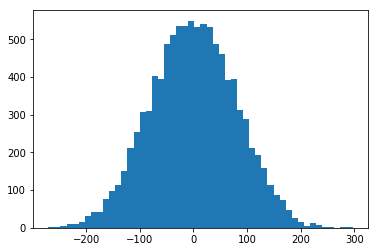

In [81]:
plt.hist(permutation_zero_distr_1sample(norm_vel_sample,40,10000), bins = 50)
plt.show()

In [82]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [83]:
permutation_test(norm_vel_sample, 40,10000)

0.0726

### Двувыборочный критерий для зависимых выборок

$ H0: E(X_1 - X_2) = 0 $
    
$ H1: E(X_1 - X_2) <> 0$

Двухвыборочная задача со связанными выборками решается с использованием абсолютно такого же критерия: от двух связанных выборок происходит переход к одной выборке соответствующих попарных разностей.

$ T = \sum_{i = 1} ^ N (D_i)$

Нулевое распределение порождается путем перебора $2^n$ знаков перед слагаемыми $ D_{i}$.

**Задача** - проверить, значимо ли изменилось время доставки курьеров после выдачи им велосипедов.

По аналогии с одновыборочным критерием, только теперь среднее 0 и в качестве данных - разница выборок.

In [84]:
permutation_test(df.time_after.iloc[:50] - df.time_before.iloc[:50],0,100000)

0.02752

### Двувыборочный критерий для независимых выборок.

Перестановочный критерий для независимых выборок выглядит абсолютно так же, как критерий МаннаУитни за исключением того, что не производятся ранговые преобразования. 

$ H_0: F_{X_{1}} (x) =  F_{X_{2}} (x) $
    
$ H1: F_{X_{1}} (x) =  F_{X_{2}} (x + ∆),∆ <> 0 $

$ T = \frac{1} {n_1} \sum_{i = 1} ^ {N_1} X_{1i} - \frac{1} {n_2}  \sum_{i = 1} ^ {N_2} X_{2i}  $

Нулевая статистика получается по аналогии с критерием Манна-Уитни путем перебора размещений объединенной выборки.

**Задача** - понять, отличается ли как-то скорость доставки заказов клиентам на электросамокатах от скорости доставки на велосипедах.

In [85]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [86]:
def get_random_combinations(n1, n2, max_combinations):
    index = np.arange(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [87]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

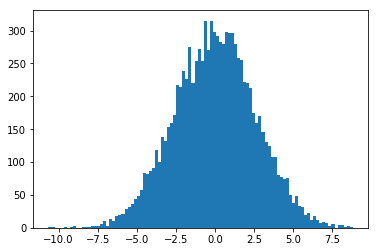

In [88]:
plt.hist(permutation_zero_dist_ind(norm_vel_sample, norm_sam_sample, max_combinations = 10000), bins = 100)
plt.show()

In [89]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [90]:
permutation_test(norm_vel_sample, norm_sam_sample, max_permutations = 100)

0.02

### 3. Анализ зависимостей

### 3.1 Регрессия

Рассмотрим среднедневное кол-во заказов блюда "Пицца" ресторанов определенного сегмента на платформе DC в октябре 2018 года.

In [91]:
orders_info = pd.read_excel('files/oct_2018_Samara_pizza.xlsx')
orders_info.head()

,Price,Orders
0,912,32
1,958,25
2,979,11
3,530,33
4,750,16


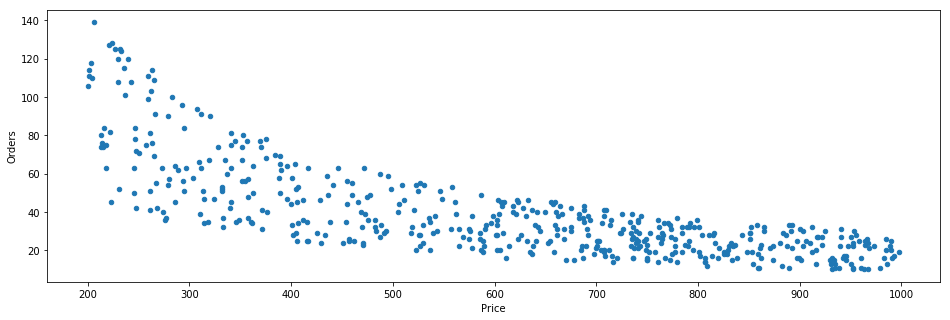

In [92]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)

**Задача.** На платформе появляется новый ресторан и хочет продавать Пиццу по определенной цене. Сколько у данного ресторана будет продаж в день?

Чтобы решить поставленную задачу - необходимо **обобщить** закономерности цены и кол-ва продаж.

Будем искать линейную зависимость между данными, построив уравнение прямой (уравнение регрессии):

$ y = ax + b $,

где y - это кол-во продаж, x - цена на продукт. 

То есть, нужно построить такую прямую, относительно которой разброс точек будет минимален. Для этого надо найти параметры уравнения регрессии <B>a</B> и <B>b</B>,а затем оценить получившиеся результаты (возможно, что найденная зависимость крайне плохо обобщает данные).

Способ нахождения линии, сумма квадратов расстояний от которой до всех точек выборки минимальна,
называется **методом наименьших квадратов**. В основе - минимизация расстояния от прямой регрессии до каждой из точек выборки.

$ ||y - Xa || ^2 -> min $, где коэффицент **b** входит в матрицу X как единичный столбец.

$a = (X^{T}X)^{-1} X^{T}y $

In [93]:
import statsmodels.formula.api as smf
model = smf.ols('Orders~Price',data=orders_info)
fitted = model.fit()

In [94]:
fitted.params

Intercept    87.989346
Price        -0.080659
dtype: float64

In [95]:
orders_info['predicted'] = fitted.params[0] + fitted.params[1]*orders_info['Price']

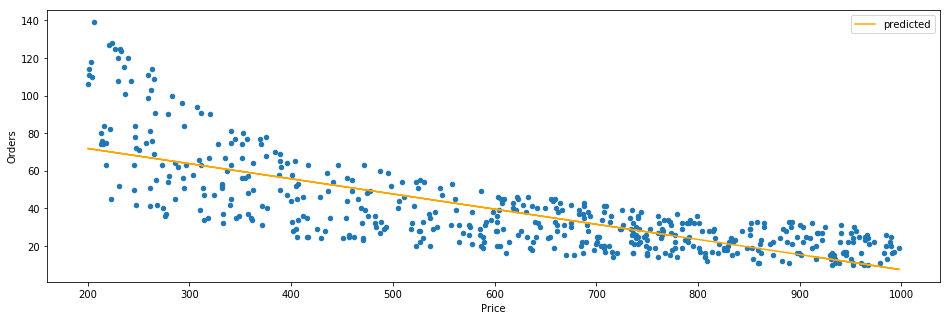

In [96]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

orders_info.plot.scatter('Price','Orders',ax = ax1)
orders_info.plot.line('Price','predicted',ax = ax1,color = 'orange')

Теперь надо оценить качество решения, получившегося с помощью метода наименьших квадратов.

$ TSS =  ESS + RSS $

$TSS = \sum_{i=1}^n(y_i-\overline{y})^2 $ - разброс относительно своего среднего.

$ESS = \sum_{i=1}^n(\hat{y_i}-\overline{y})^2 $ - объясненная сумма квадратов,сумма квадратов отклонений среднего от предсказанных y.

$RSS = \sum_{i=1}^n(\hat{y_i}-y_i)^2 $ - остаточная сумма квадратов.

$R^2 = \frac{ESS}{TSS}$ - **коэффициент детерминации**, доля объясненной дисперсии отклика во всей дисперсии отклика.

In [97]:
fitted.rsquared

0.5800274817271207

### Предположения МНК

- Предполагается, что истинная модель y действительно линейна.
- Предполагается, что наблюдения, по которым оценивается модель, случайны, то есть объекты дают независимую выборку наблюдений.
- Предполагается, что ни один из признаков не является линейной комбинацией других.
- Предполагается, что ошибка случайна.

### Оценка коэффициентов модели

### - критерий Стьюдента

$ H0: a = 0 $

$ H1: a  <> 0 $

Статистика T:

$T =  \frac{a}{\sqrt{\frac{RSS}{n-k-1}(XX^{t})^{-1}}}$

Гипотеза о равенстве нулю коэффициента **a** означает, что признак x не влияет на отклик y.

In [98]:
fitted.tvalues

Intercept    44.009606
Price       -26.225786
dtype: float64

In [99]:
fitted.pvalues

Intercept    9.578626e-174
Price         7.124488e-96
dtype: float64

### - критерий Фишера

$ H0: a_1 ... a_k = 0 $

$ H1: \text{H0 неверна} $

Статистика F:

$F =  \frac{R^2/k}{(1 - R^2)/(n-k-1)}$

Требуется проверить гипотезу о том, что все признаки X для предсказания y не нужны, то есть лучшее предсказание для y — это константа. 

In [100]:
fitted.f_pvalue

7.124488003451089e-96

In [101]:
fitted.fvalue

687.7918752588997

### - информационные критерии

$ AIC = 2k/n - 2l/n $

k - кол-во парметров модели, l - логарифмическая функция правдоподобия, n - объем выборки

$ AIC = k\ln{n} - 2l $

In [102]:
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Orders   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     687.8
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           7.12e-96
Time:                        22:40:02   Log-Likelihood:                -2087.4
No. Observations:                 500   AIC:                             4179.
Df Residuals:                     498   BIC:                             4187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.9893      1.999     44.010      0.0

In [103]:
#Jarque-Bera  - тест на нормальность
#Durbin-Watson - тест на автокорреляцию
#Omnibus - ESS > RSS

### 3.2 Корреляция

Регрессионный анализ позволяет оценить, как одна переменная
зависит от другой и каков разброс значений зависимой переменной вокруг прямой, определяющей зависимость.  Однако часто интересует не предсказание
значения одной переменной по значению другой, а просто характеристика тесноты (силы) связи между ними, при этом выраженная одним числом.

**Корреляция Пирсона**

$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$

Корреляция Пирсона — это мера силы линейной взаимосвязи между двумя случайными величинами X1 и X2.

<img width = '900px' src="images/lesson_8/corp1.png">

<img width = '900px' src="images/lesson_8/corp2.png">

<img width = '900px' src="images/lesson_8/corp3.png">

<img width = '900px' src="images/lesson_8/corp4.png">

In [104]:
orders_info[['Price','Orders']].corr()

,Price,Orders
Price,1.000000,-0.761595
Orders,-0.761595,1.000000


Как интерпретировать полученный коэффицент? 

Для ответа на вопрос по аналогии существует критерий (статистический критерий Стьюдента) и соответвующая статистика:

H0: r = 0

H1: r <> 0

$ T = \frac{r_{X_1X_2}\sqrt{n-2}}{\sqrt{1 - r_{X_1X_2}^2}}$

In [105]:
scipy.stats.pearsonr(orders_info.Price,orders_info.Orders)

(-0.7615953530104559, 7.124488003450482e-96)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена — это мера силы монотонной взаимосвязи между двумя случайными величинами, он равен коэффициенту корреляции Пирсона между рангами наблюдений.

$ \rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}} $


<img width = '900px' src="images/lesson_8/cors1.png">

<img width = '900px' src="images/lesson_8/cors2.png">

<img width = '900px' src="images/lesson_8/cors3.png">

<img width = '900px' src="images/lesson_8/cors4.png">

In [106]:
scipy.stats.spearmanr(orders_info.Price,orders_info.Orders)

SpearmanrResult(correlation=-0.7882611757083685, pvalue=4.320553213521898e-107)

**Корреялция Мэтьюса**

Коэффициент корреляции Мэтьюса — это мера силы взаимосвязи между двумя бинарными переменными. 

<img width = '500px' src="images/lesson_8/mat.png">

$MCC = \frac{ad-bc}{\sqrt{(a+b)(a+c)(b+d)(c+d)}} $

Проверка значимости корреляции:

H0: MCC = 0

H1: MCC <> 0

Статистика критерия: $\chi^2  = nMCC^2$

In [107]:
#Коэффициент используется как качество моделей бинарной классификации
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred) 

-0.3333333333333333

**Корреляция Крамера**

Коэффициент корреляции Крамера — это мера силы взаимосвязи между категориальными переменными. 

Коэффициент Крамера принимает значения исключительно в интервале от 0 до 1,то есть он не может быть отрицательным. 0 соответствует полному отсутствию взаимосвязи,а 1 — полному совпадению переменных X1 и X2 с точностью до переименования уровней. Корреляция между двумя категориальными переменныминеможетбытьотрицательной,посколькууровникатегориальныхпеременныхнесвязаныдруг с другом отношениями порядков.

<img width = '500px' src="images/lesson_8/kram.png">

$ \phi = \sqrt{\frac{\chi^2(X_1^n,X_2^n)}{n(min(K_1,K_2) - 1)} }$

Значимость критерия:

H0: X1 и X2 независимы

H1: H0 неверна

Статистика критерия:

<img width = '300px' src="images/lesson_8/kram_stat.png">

In [108]:
import pandas as pd
confusion_matrix = pd.crosstab(df[column1], df[column2])

NameError: name 'column1' is not defined

In [110]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

### Задача

In [111]:
data = pd.read_csv('files/kc_house_data.csv')

In [112]:
pd.set_option('max_columns', 50)

In [113]:
data.shape

(21613, 21)

In [114]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Признаки 'date', 'zipcode', 'lat','long' можно успешно использовать для улучшения модели, но для упрощения здесь отбросим их.

In [115]:
data.drop(['id', 'date', 'zipcode', 'lat','long'] ,axis =1, inplace = True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


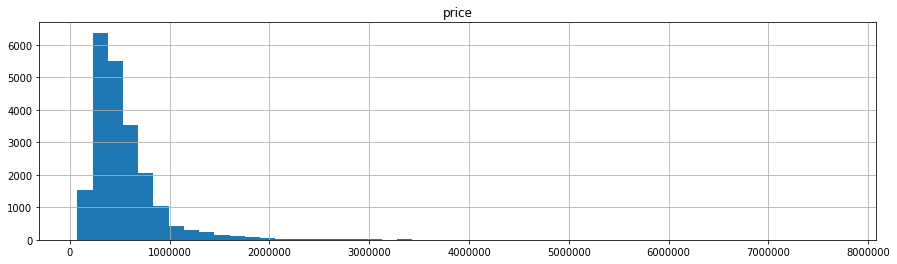

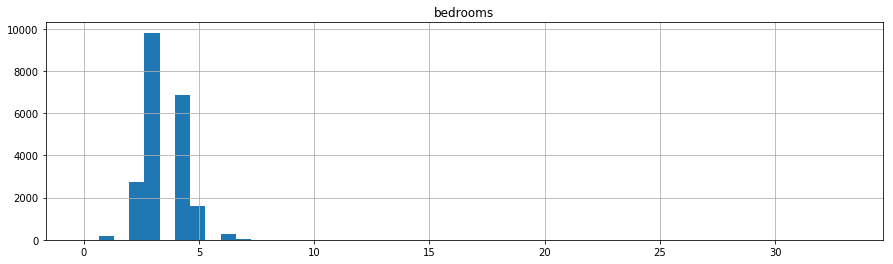

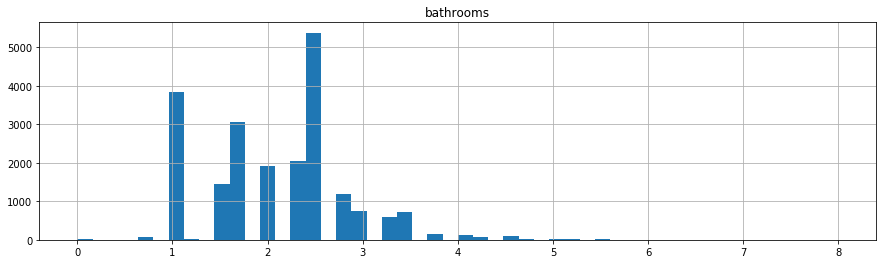

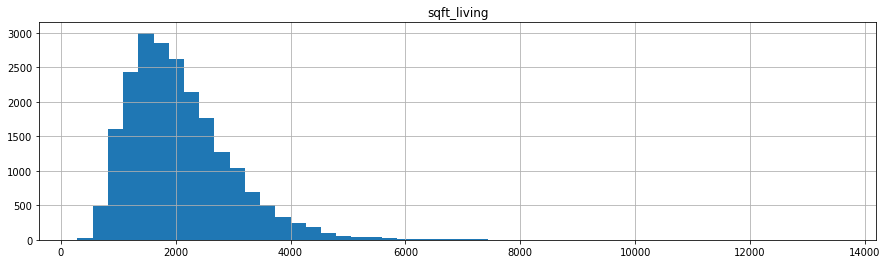

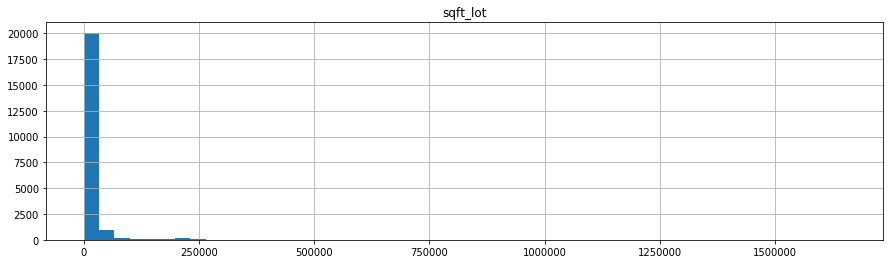

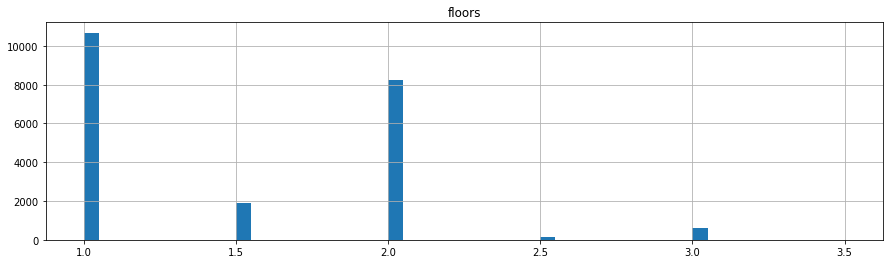

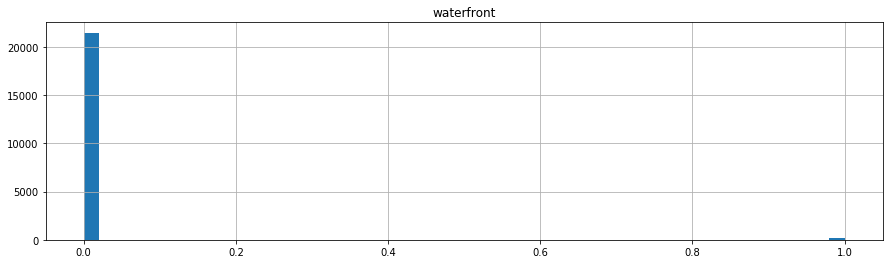

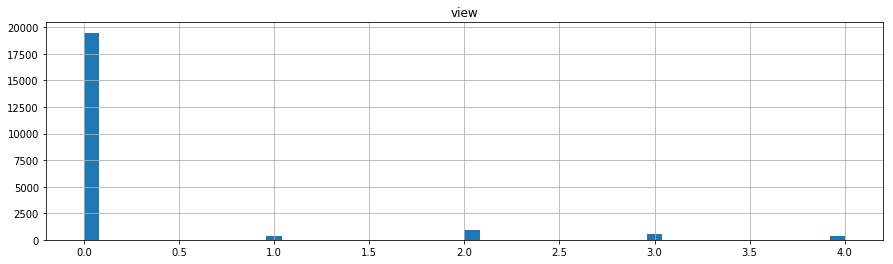

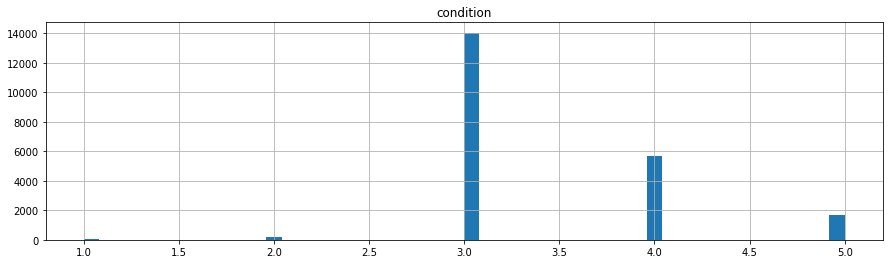

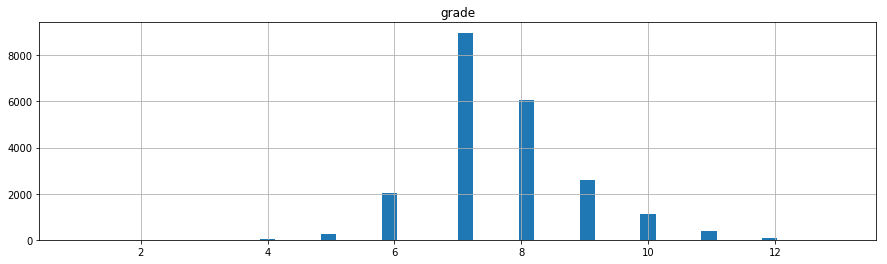

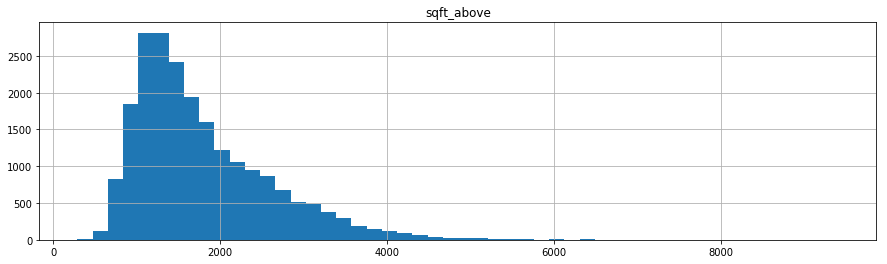

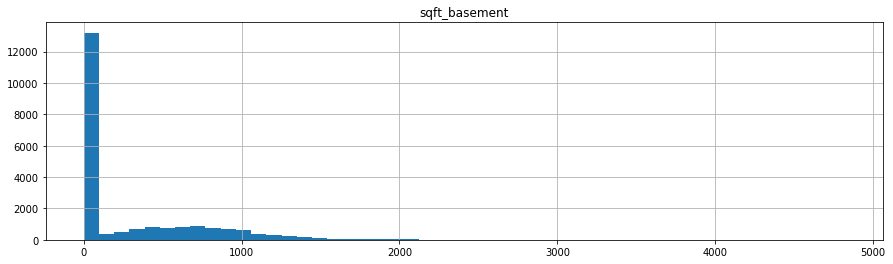

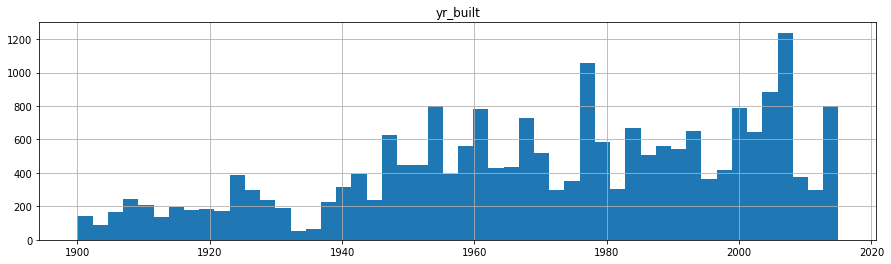

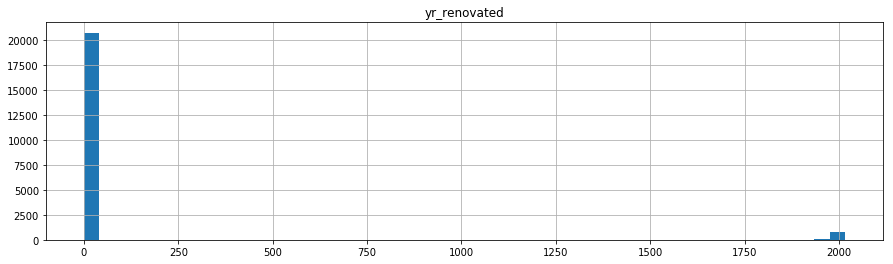

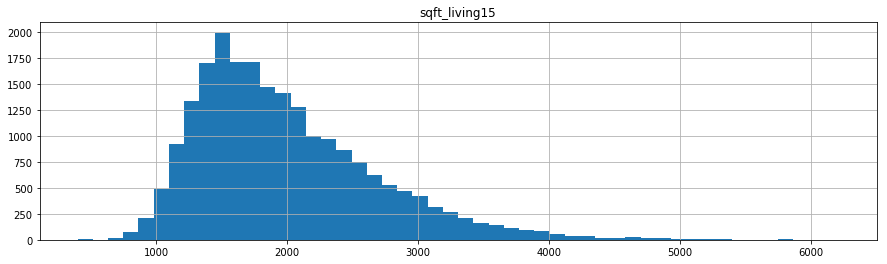

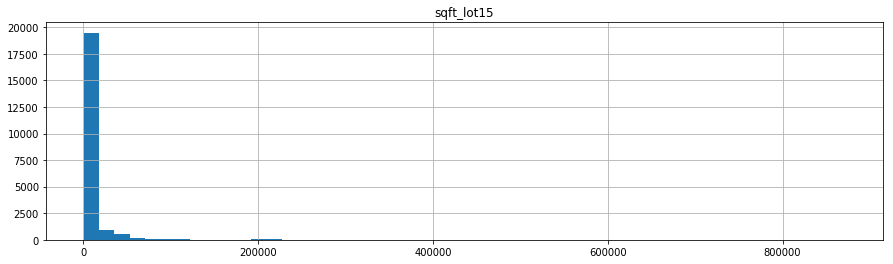

In [117]:
for c in data.columns:
    data.loc[:,c].hist(bins = 50,figsize=(15,4))
    plt.title(c)
    plt.show()

In [119]:
model = smf.ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15',             data=data)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2913.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:44:03   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.924e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.195e+06   1.38e+05     44.754

In [ ]:
# data['exper'],fitted.resid

### Литература

- Кобзарь. Прикладная математическая статистика (2006)
- Kanji. 100 statistical tests (2006)
- Глантц. Медико-биологическая статистика (1999)
- Лагутин. Наглядная математическая статистика (2007)